In [77]:
#import libs (copy& pastefrom EDA file))
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [78]:
df = pd.read_csv('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/df1_understanding_the_data.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     21597 non-null  float64
 11  view           21597 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21597 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   21597 non-null  float64
 18  zipcod

In [80]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   id.1           21597 non-null  int64         
 5   bedrooms       21597 non-null  float64       
 6   bathrooms      21597 non-null  float64       
 7   sqft_living    21597 non-null  float64       
 8   sqft_lot       21597 non-null  float64       
 9   floors         21597 non-null  float64       
 10  waterfront     21597 non-null  float64       
 11  view           21597 non-null  float64       
 12  condition      21597 non-null  int64         
 13  grade          21597 non-null  int64         
 14  sqft_above     21597 non-null  float64       
 15  sqft_basement  2159

In [81]:
df.isnull().sum()

date             0
price            0
house_id         0
id               0
id.1             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

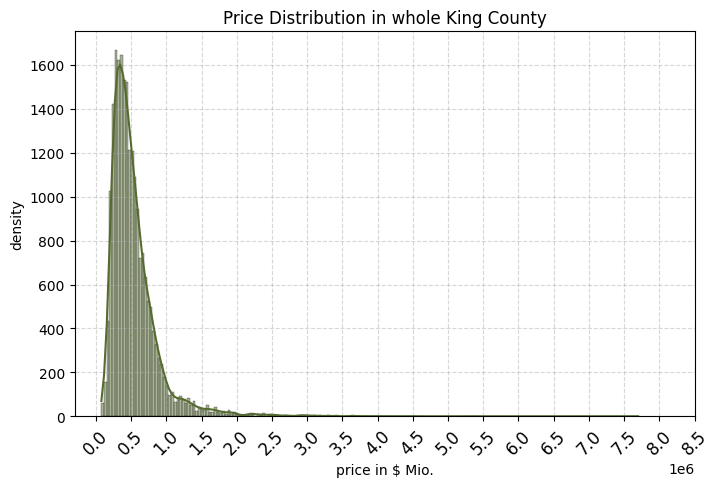

In [82]:
#price distribution in whole King County
#df2 = df[df2['price'] < 2_500_000] #cutting outliers
price_dist_plot = sns.histplot(df['price'], bins=200, color='darkolivegreen', kde=True)
plt.title('Price Distribution in whole King County')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
#suggested by copilot
#plt.xlim(0, 5_500_000)
plt.xticks(np.arange(0, 8_500_001, 500_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show(price_dist_plot)


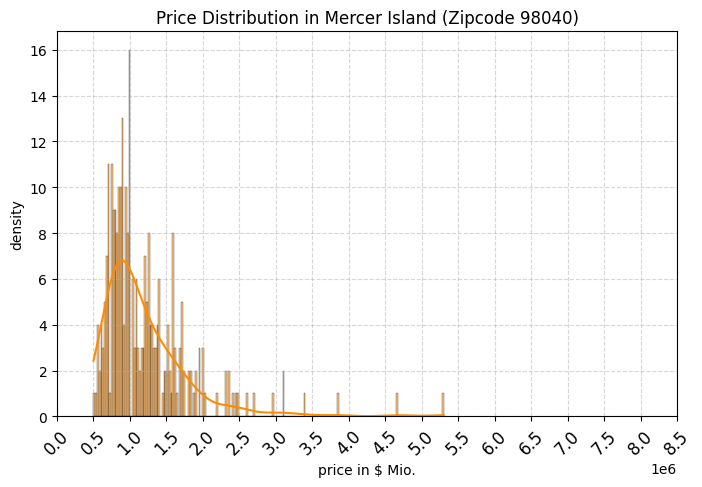

In [83]:
#since the customer wanted to live in a lively and central ares; I googled what is center of population in King County. Result: Mercer Island with zipcode 98040
#I will now compare the price distribution of this area with the whole King County 
df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
sns.histplot(df_price_in_mercer['price'], bins=200, color='darkorange', kde=True)
plt.title('Price Distribution in Mercer Island (Zipcode 98040)')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
#plt.xlim(0, 5_500_000)
plt.xticks(np.arange(0, 8_500_001, 500_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show(price_dist_plot2)  

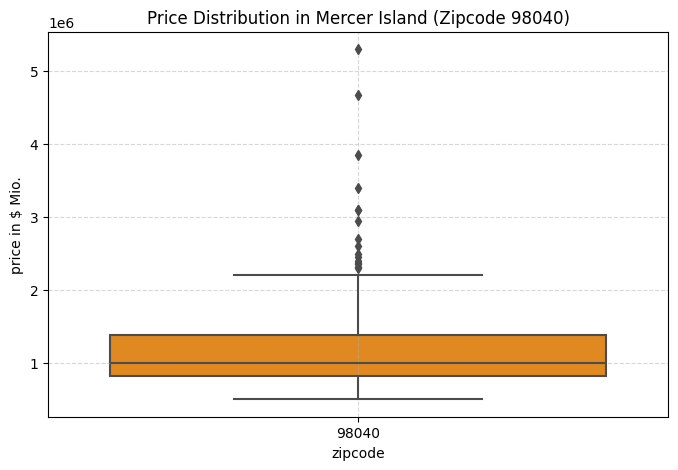

In [95]:
sns.boxplot(x=df_price_in_mercer['zipcode'], y=df_price_in_mercer['price'], color='darkorange')

plt.title('Price Distribution in Mercer Island (Zipcode 98040)')
plt.xlabel('zipcode')
plt.ylabel('price in $ Mio.')
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

In [85]:
df_price_in_mercer['price'].describe()

'''
count       282.000
mean    1194873.638
std      607767.642
min      500000.000
25%      822000.000
50%      993750.000
75%     1387500.000
max     5300000.000'''

'\ncount       282.000\nmean    1194873.638\nstd      607767.642\nmin      500000.000\n25%      822000.000\n50%      993750.000\n75%     1387500.000\nmax     5300000.000'

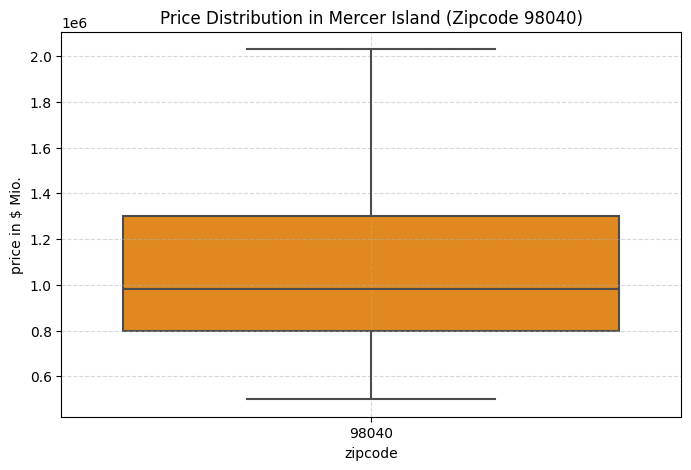

In [96]:
# Filter prices below 2,500,000 for the boxplot
filtered = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000]
sns.boxplot(x=filtered['zipcode'], y=filtered['price'], color='darkorange')

plt.title('Price Distribution in Mercer Island (Zipcode 98040)')
plt.xlabel('zipcode')
plt.ylabel('price in $ Mio.')
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()


In [88]:
#I decide to progress with the quantiles of the price distribution in Mercer Island
q1 = df_price_in_mercer['price'].quantile(0.25)
q2 = df_price_in_mercer['price'].quantile(0.50)
q3 = df_price_in_mercer['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, IQR: {iqr}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")  

Q1: 822000.0, Q2: 993750.0, Q3: 1387500.0, IQR: 565500.0, Lower Bound: -26250.0, Upper Bound: 2235750.0


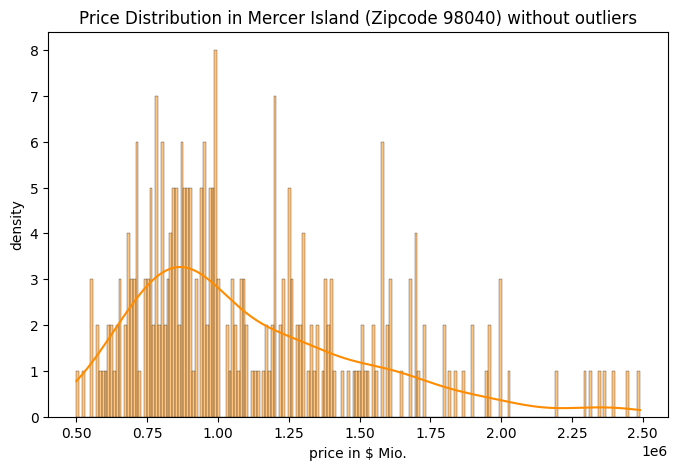

In [69]:
#tring to find out "midprice"
df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_500_000] #cutting outliers
price_dist_plot2 = sns.histplot(df_price_in_mercer_cleaned['price'], bins=200, color='darkorange', kde=True)
plt.title('Price Distribution in Mercer Island (Zipcode 98040) without outliers')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
plt.show()

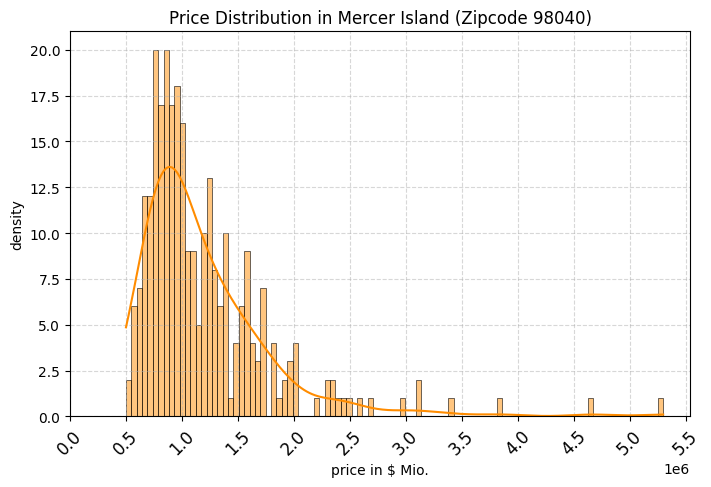

In [44]:
#best would be to truncate x-achsis from the right
price_dist_plot_98040 = sns.histplot(filtered_dnj1['price'], bins=100, color='darkorange', kde=True)
plt.title('Price Distribution in Mercer Island (Zipcode 98040)')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
#plt.xlim(0, 5_500_000)
plt.xticks(np.arange(0, 5_500_001, 500_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show(price_dist_plot2)  

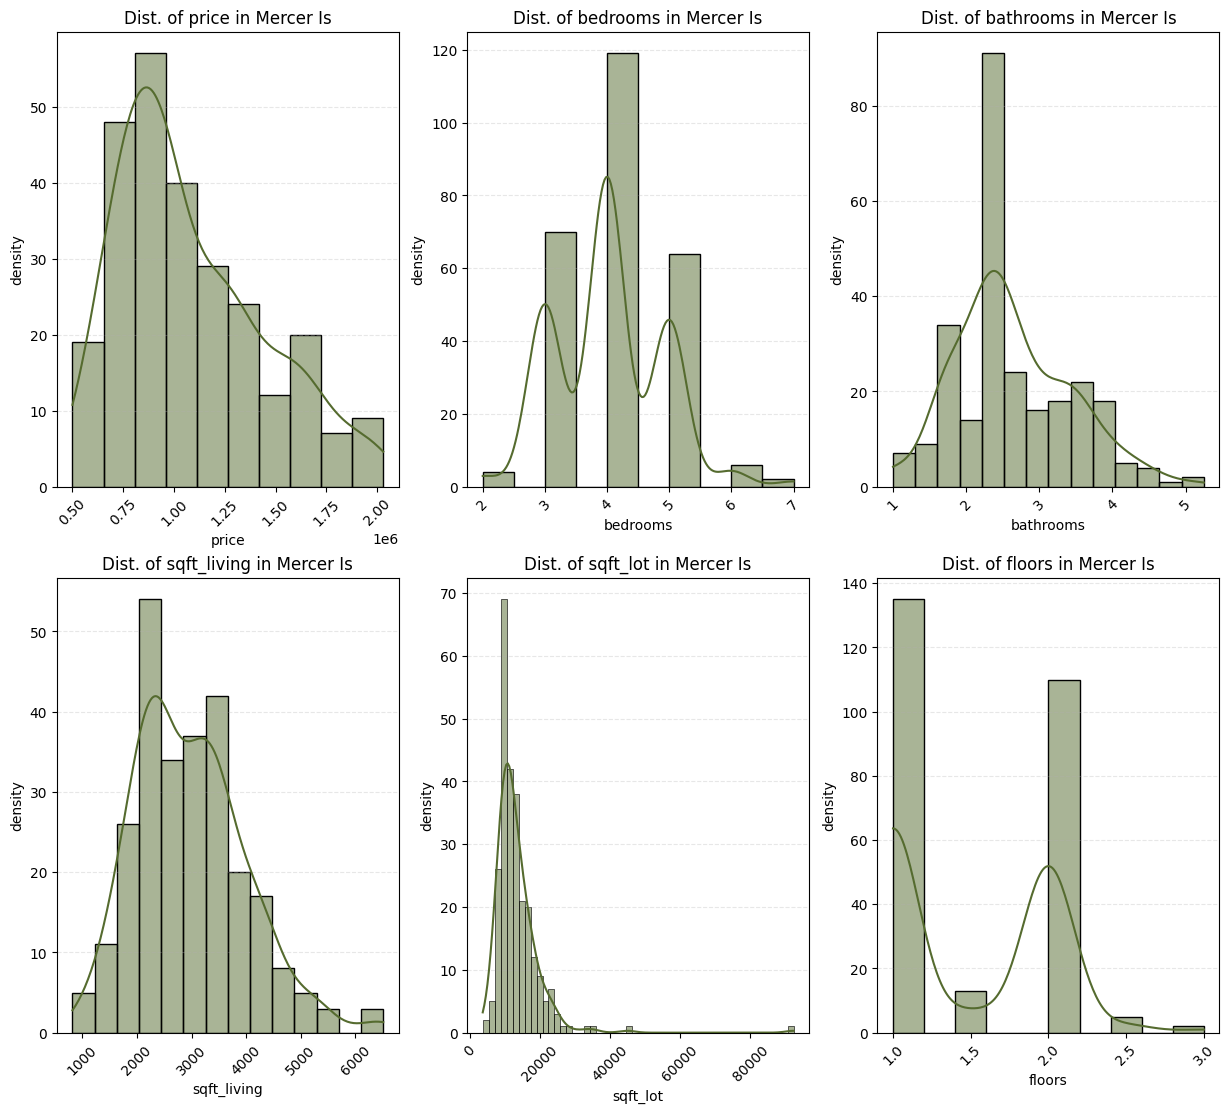

In [135]:
df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000] #cutting outliers
continous_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'] #histoplots of continous vars

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 13))

for ax, column in zip(axes.flatten(), continous_vars):
    sns.histplot(x=column, data=df_price_in_mercer_cleaned, ax=ax, color='darkolivegreen', kde=True)
    ax.set_title(f'Dist. of {column} in Mercer Is', fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('density', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    #ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000] #cutting outliers
continous_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'] #histoplots of continous vars
categoric_vars = ['condition', 'grade', 'waterfront', 'view', 'zipcode'] #histoplots of categorical vars

In [136]:
df_price_in_mercer_cleaned.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2014-08-26,2000000.000,2524049179,22,2524049179,3.000,2.750,3050.000,44867.000,1.000,...,9,2330.000,720.000,1968,0.000,98040,47.532,-122.233,4110.000,20336.000
95,2014-09-08,905000.000,1483300570,96,1483300570,4.000,2.500,3300.000,10250.000,1.000,...,7,2390.000,910.000,1946,19910.000,98040,47.587,-122.249,1950.000,6045.000
192,2014-09-12,799000.000,2287000060,193,2287000060,3.000,2.500,2140.000,9897.000,1.000,...,8,2140.000,0.000,1959,0.000,98040,47.550,-122.219,2680.000,10083.000
205,2014-08-04,840000.000,3456000310,206,3456000310,4.000,1.750,2480.000,11010.000,1.000,...,9,1630.000,850.000,1966,0.000,98040,47.538,-122.219,2770.000,10744.000
216,2015-02-21,1510000.000,46100204,217,46100204,5.000,3.000,3300.000,33474.000,1.000,...,9,1870.000,1430.000,1957,19910.000,98040,47.567,-122.210,3836.000,20953.000


In [150]:
#Preisrange von 822 000 bis 1.387.500
#Median 993.750

#how many hosue are in budgeet
houses_in_budget = df_price_in_mercer_cleaned[df_price_in_mercer_cleaned['price'].between(822000, 1387500)]

In [152]:
houses_in_budget.value_counts()

date        price        house_id    id     id.1        bedrooms  bathrooms  sqft_living  sqft_lot   floors  waterfront  view   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat     long      sqft_living15  sqft_lot15
2014-05-08  830000.000   5450900140  1719   5450900140  5.000     3.000      3040.000     9601.000   1.000   0.000       0.000  5          9      1970.000    1070.000       1968      0.000         98040    47.556  -122.220  3180.000       12390.000     1
2015-02-20  998000.000   3317500100  8900   3317500100  5.000     3.500      3760.000     10207.000  2.000   0.000       0.000  3          10     3150.000    610.000        1969      0.000         98040    47.560  -122.225  3550.000       12118.000     1
2015-01-12  984000.000   6672900220  14572  6672900220  4.000     2.250      2390.000     12292.000  1.000   0.000       0.000  5          9      2390.000    0.000          1962      0.000         98040    47.553  -122.221  2870.000       1

In [169]:

offer_list_nj = houses_in_budget[
    (houses_in_budget['price'].between(822000, 1387500)) &
    (houses_in_budget['grade'] >= 9) &
    (houses_in_budget['bedrooms'] >= 4) &
    (houses_in_budget['bathrooms'] >= 2) &
    (houses_in_budget['sqft_living'] >= 3000) &
    (houses_in_budget['sqft_lot'] >= 10000) &
    (houses_in_budget['floors'] >= 2) &
    (houses_in_budget['waterfront'] >= 0) &
    (houses_in_budget['view'] >= 1)]


In [171]:
offer_list_nj = offer_list_nj.sort_values(by='price', ascending=True)
offer_list_nj.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15715,2014-09-29,850000.000,2194100050,15716,2194100050,4.000,2.500,3180.000,11652.000,2.000,...,9,3180.000,0.000,1977,0.000,98040,47.567,-122.212,3110.000,15183.000
12303,2014-06-02,870000.000,1924059248,12304,1924059248,4.000,3.000,4500.000,21780.000,2.000,...,9,3040.000,1460.000,1980,0.000,98040,47.558,-122.213,3540.000,20473.000
4577,2015-04-23,1050000.000,5460600110,4578,5460600110,6.000,4.000,5310.000,12741.000,2.000,...,10,3600.000,1710.000,1967,0.000,98040,47.570,-122.213,4190.000,12632.000
394,2014-07-28,1120000.000,1923000030,395,1923000030,4.000,2.500,3840.000,16619.000,2.000,...,10,3840.000,0.000,1983,0.000,98040,47.563,-122.213,3600.000,16553.000
11459,2014-09-21,1180000.000,2524049250,11460,2524049250,5.000,2.250,3270.000,16553.000,2.000,...,9,2470.000,800.000,1968,0.000,98040,47.543,-122.236,3690.000,17916.000


In [172]:
offer_list_nj.to_csv('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/offer_list_nj.csv', index=False)

In [159]:
offer_list_nj

,grade,count
0,6,1
1,7,4
2,8,41
3,9,54
4,10,32
5,11,8


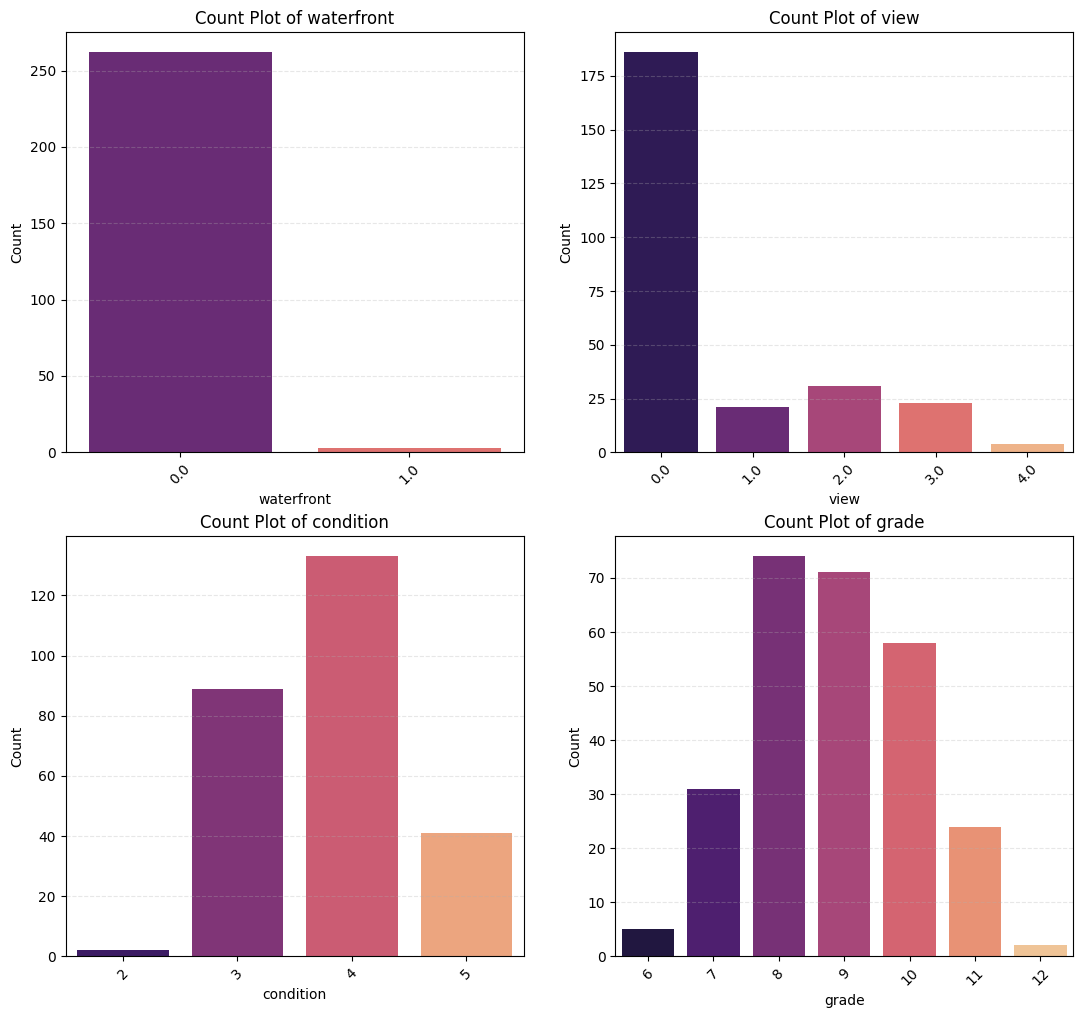

In [97]:
df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000] #cutting outliers
categoric_vars = ['waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 12))

for ax, column in zip(axes.flatten(), categoric_vars):
    sns.countplot(x=column, data=df_price_in_mercer_cleaned, palette='magma', ax=ax) #palette magma can be found in https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    #ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
df2.isnull().sum() #check for missing values one more time

date             0
price            0
house_id         0
id               0
id.1             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

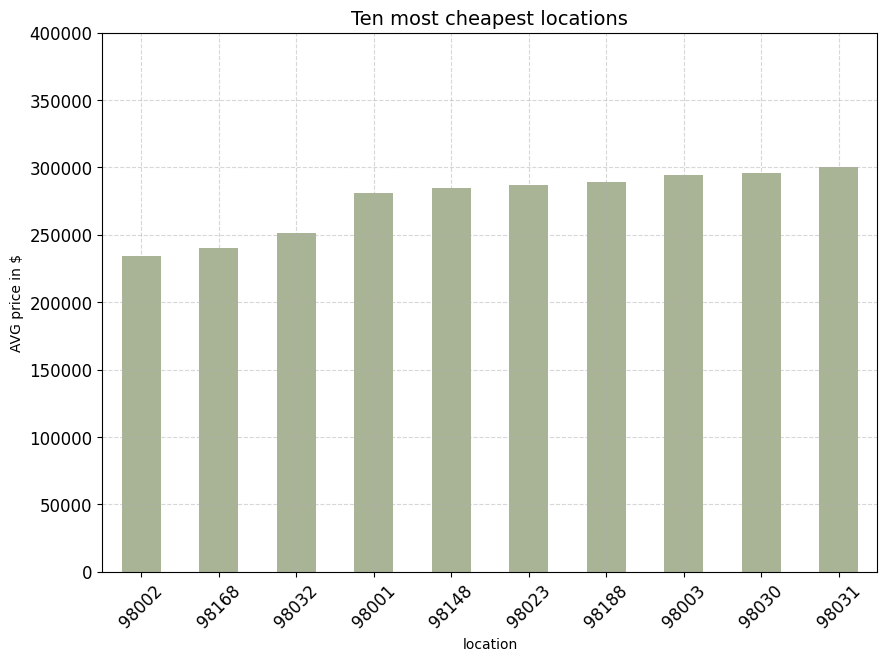

In [ ]:
#avg pro zip - CHEAPEST LOCATIONS ONE MORE TIME
mean_price_per_zp = df2.groupby('zipcode')['price'].mean()

#cheapest zips
cheapest10 = mean_price_per_zp.nsmallest(10)

#plotten
plt.figure(figsize=(10, 7))
cheapest10.plot(kind='bar', color='darkolivegreen', alpha=0.5)

#visuals
    #title
plt.title('Ten most cheapest locations', fontsize=14)
    #x-label
plt.xlabel('location')
plt.xticks(rotation=45, fontsize=12)
    #y-label
plt.ylabel('AVG price in $')
plt.yticks(np.arange(0, 400_001, 50_000), fontsize=12)
plt.ylim(0, 400_000)
    #backround
#plt.gca().set_facecolor('white', alpha=0.8) #here the background color is set to white with 80% opacity
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

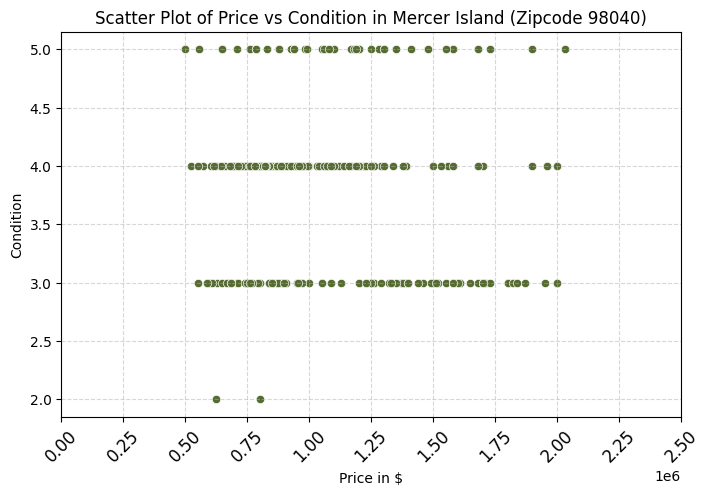

In [ ]:
df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000] #cutting outliers
categoric_vars = ['waterfront', 'view', 'condition', 'grade']
continous_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'] #histoplots of continous vars

sct_plot_mercer_condtion = sns.scatterplot(x='price', y='condition', data=df_price_in_mercer_cleaned, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Condition in Mercer Island (Zipcode 98040)')
plt.xlabel('Price in $')
plt.ylabel('Condition')
plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

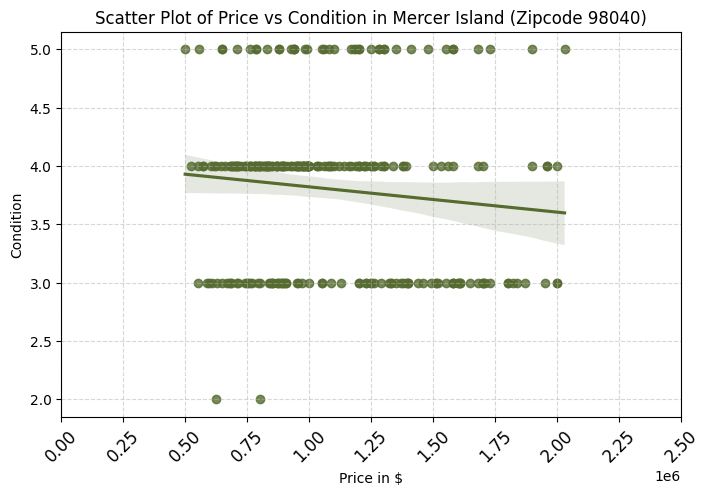

In [ ]:
reg_plot_mercer_condition = sns.regplot(x='price', y='condition', data=df_price_in_mercer_cleaned, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Condition in Mercer Island (Zipcode 98040)')
plt.xlabel('Price in $')
plt.ylabel('Condition')
plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

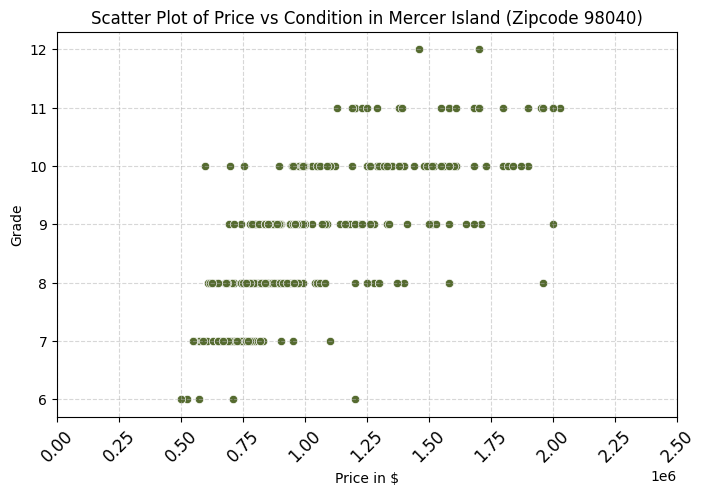

In [109]:
sct_plot_mercer_grade = sns.scatterplot(x='price', y='grade', data=df_price_in_mercer_cleaned, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Condition in Mercer Island (Zipcode 98040)')
plt.xlabel('Price in $')
plt.ylabel('Grade')
plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

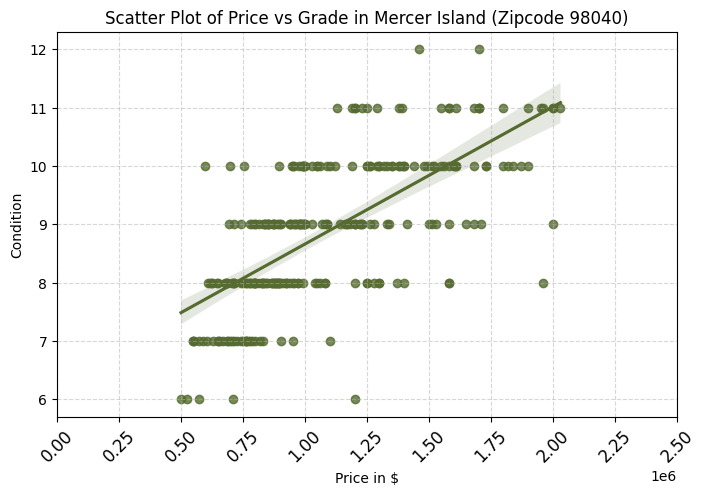

In [111]:
reg_plot_mercer_condition = sns.regplot(x='price', y='grade', data=df_price_in_mercer_cleaned, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Grade in Mercer Island (Zipcode 98040)')
plt.xlabel('Price in $')
plt.ylabel('Condition')
plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()